In [275]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import mlflow
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from sklearn.svm import SVR

## Reading Data

In [276]:
amsterdam_data = pd.read_csv('Amsterdam.csv', index_col=0)
amsterdam_data.fillna(0,inplace=True)   
amsterdam_features = amsterdam_data.drop(columns=["h3_index", "geometry"])
amsterdam_features

,bike_paths_count,green_areas_count,buildings_count,population,recreational_areas_count,distance_to_centrum
0,497,5214,56742,57846.7900,549.0,4337.341607
1,301,8239,28427,37524.0040,213.0,3400.249622
2,75,1308,5860,30317.7270,58.0,10060.417287
3,228,9374,24672,24311.6400,127.0,5279.150761
4,296,5789,73020,56579.0100,1800.0,7064.778304
5,393,6710,40944,66023.2600,479.0,10799.959932
6,392,3355,55088,51387.4530,560.0,9986.550069
7,428,12314,41807,50820.1840,725.0,1637.079106
8,79,16675,6235,27066.5980,327.0,3196.351370
9,64,3815,8228,9945.5020,159.0,5667.550237


In [277]:
krakow_data = pd.read_csv('Krakow.csv', index_col=0)
krakow_data.fillna(0, inplace=True)
krakow_features = krakow_data.drop(columns=["h3_index", "geometry"])
krakow_data

,h3_index,bike_paths_count,geometry,green_areas_count,buildings_count,population,recreational_areas_count,distance_to_centrum
0,871e2e6a5ffffff,3,"POLYGON ((19.98531457210276 50.12348706974358,...",23,115,5222.536,0.0,9489.404598
1,871e2e6a6ffffff,66,"POLYGON ((19.93273977798674 50.10530459491888,...",15839,20568,22772.516,505.0,4302.447964
2,871e2e6b5ffffff,241,"POLYGON ((19.91499031217532 50.08726072767821,...",6410,24502,43849.062,632.0,2123.895405
3,871e2e6b0ffffff,109,"POLYGON ((19.89725008565403 50.06920996123178,...",7795,29615,47750.836,1168.0,2316.187277
4,871e05b4dffffff,40,"POLYGON ((19.84474239032753 50.05097647936642,...",1523,6252,6415.922,17.0,8296.344373
...,...,...,...,...,...,...,...,...
61,871e2e6f5ffffff,18,"POLYGON ((20.15860190646724 50.08813076978268,...",1153,5229,7450.237,1.0,26713.855414
62,871e05b4bffffff,2,"POLYGON ((19.84408480368089 50.01501632098978,...",1367,12089,12700.834,57.0,9850.609851
63,871e05a64ffffff,1,"POLYGON ((19.82638149615456 49.99693801208746,...",889,3826,10399.775,19.0,12541.487720
64,871e2e6f4ffffff,35,"POLYGON ((20.12379591052941 50.08803767672909,...",1577,2800,12849.699,8.0,22875.039738


## EDA

Heatmap was created to check correlation between variables and bike_paths_count variable


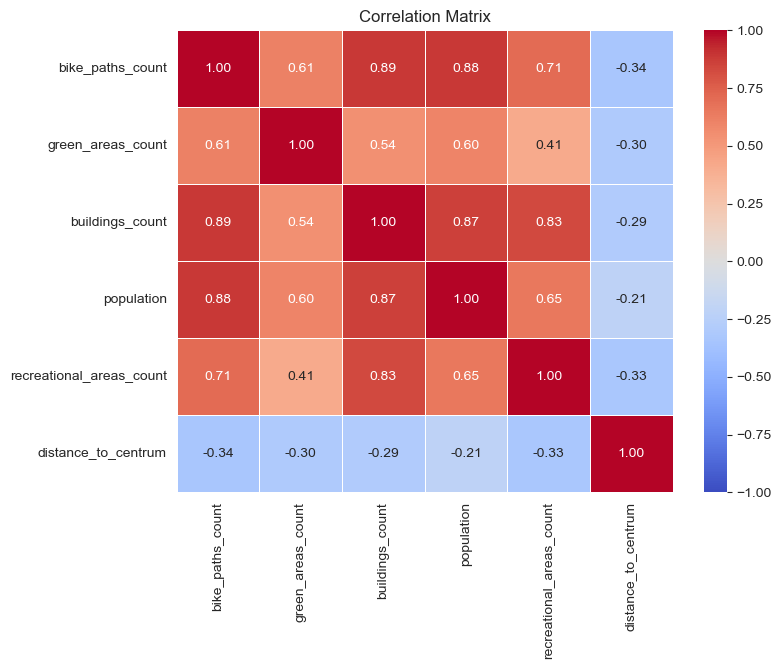

In [278]:
plt.figure(figsize=(8, 6))
sns.heatmap(amsterdam_features.corr(),
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            vmin=-1,
            vmax=1)

plt.title('Correlation Matrix')
plt.show()

As evident from the above visualization, the number of bike paths in Amsterdam is highly correlated with the number of buildings and population density in a given area. It is also strongly correlated with the number of green areas and recreational points (shops, sports facilities, and schools). Additionally, there is a negative correlation of -0.34 with the distance from the city center, indicating that the further an area is from the city center, the fewer bike paths it has. Generally, the overall trends observed in the heatmap suggest that a greater number of bike paths are found in the city center, where there are more buildings, recreational points, and green areas. These results, of course, pertain to Amsterdam, and it is important to consider the context. For instance, the city's demographics and the specific urban structure can significantly influence these findings. In Amsterdam, the city center may have more green spaces and buildings, whereas in Krakow, for example, a higher density of buildings might be found in large residential areas rather than the city center.

To further explore the obtained results and examine the differences in the relationships found for Amsterdam and Krakow, a heatmap was also created for the results obtained for Krakow.

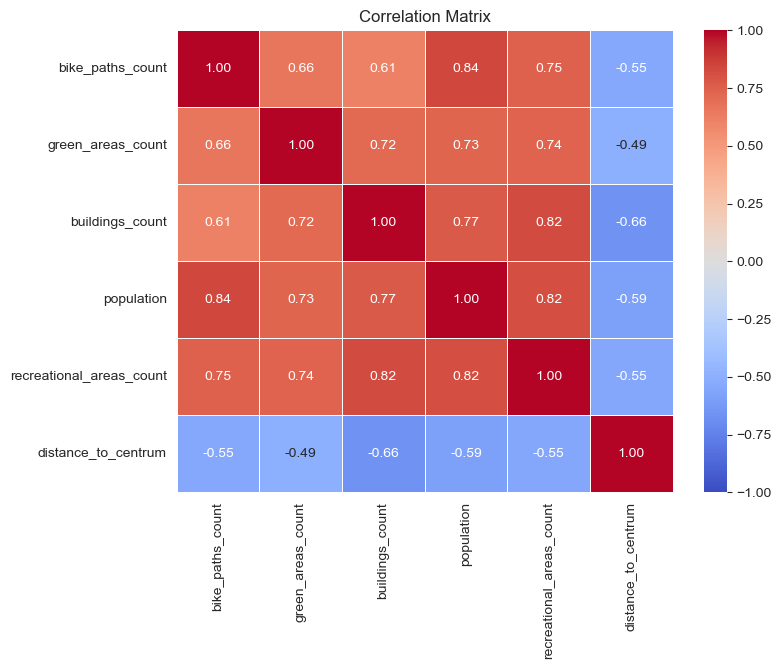

In [279]:
plt.figure(figsize=(8, 6))
sns.heatmap(krakow_features.corr(),
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            vmin=-1,
            vmax=1)

plt.title('Correlation Matrix')
plt.show()

Another heatmap representing differences between correlation coefficients for both cities was created and presented below

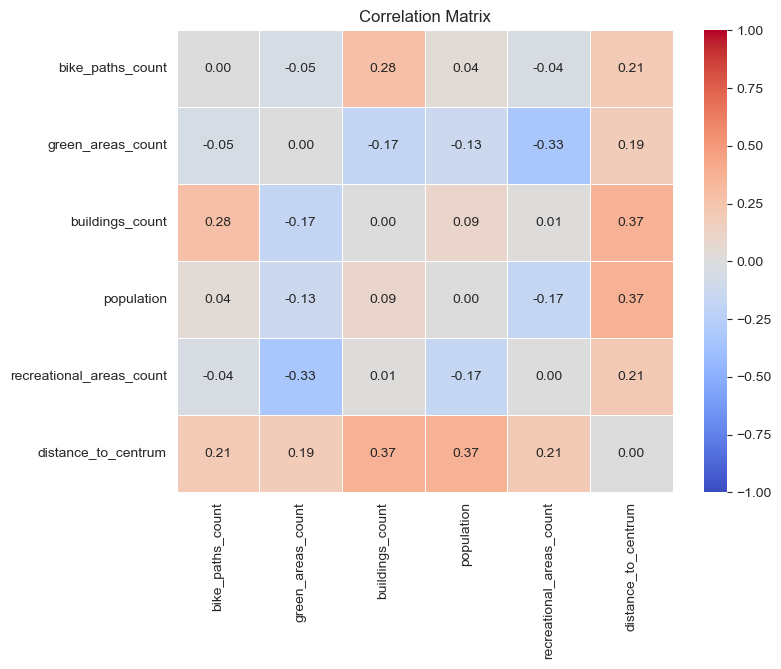

In [280]:
plt.figure(figsize=(8, 6))
sns.heatmap(amsterdam_features.corr() - krakow_features.corr(),
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            vmin=-1,
            vmax=1)

plt.title('Correlation Matrix')
plt.show()

In the case of Kraków, the most significant differences between this city and Amsterdam in the correlation between various factors and the number of bike paths are found in the features containing data on the number of buildings in a given area and the distance of that area from the city center. For Kraków, there is a much smaller impact of the number of buildings on the number of bike paths, however the distance from the center is much more significant that it is for Amsterdam. The reason probably being that bike paths in Amsterdam are more evenly distributed throughout the city, and Kraków being less developed city in this regard has more bike paths concentrated around city center.

Based on the above visualizations, one can also draw interesting conclusions about the spatial organization of both cities. The correlation coefficient between the number of buildings in a given area and its distance from the center is twice as high for Kraków as it is for Amsterdam. This means that as one moves away from the city center, the number of buildings decreases more rapidly and significantly in Kraków than in Amsterdam. This could be related to the fact that Kraków is almost twice the size of Amsterdam but has fewer residents, resulting in areas that are much less densely populated than in Amsterdam. These less densely populated areas are likely to be far from the city center.

This is also reflected in the correlation coefficients between the distance from the city center and other features such as population density and the number of recreational points, which, like the number of buildings, have higher magnitudes in Kraków compared to Amsterdam.

## Scaling data

Data for both cities was scaled using Standard Scaler method

In [281]:
scaler = StandardScaler()

X_data_amsterdam = amsterdam_features.drop(columns=["bike_paths_count"])

scaler.fit(X_data_amsterdam)
amsterdam_col_names = X_data_amsterdam.columns
X_data_amsterdam = pd.DataFrame(data=scaler.transform(X_data_amsterdam), columns = amsterdam_col_names)


X_data_krakow = krakow_features.drop(columns=["bike_paths_count"])

scaler.fit(X_data_krakow)
krakow_col_names = X_data_krakow.columns
X_data_krakow = pd.DataFrame(data=scaler.transform(X_data_krakow),columns = krakow_col_names)

## Models

Setting up mlflow tracking

In [282]:
mlflow.set_experiment('bike_paths_experiment')

2024/06/09 16:39:48 INFO mlflow.tracking.fluent: Experiment with name 'bike_paths_experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location=('file:///C:/Users/MikiM/OneDrive/Pulpit/magisterka/1 semestr/Analiza w '
 'noz/Location_Intelligence/Location '
 'Intelligence/LocationIntelligence/your_mlflow_tracking_uri/441336045040341443'), creation_time=1717943988607, experiment_id='441336045040341443', last_update_time=1717943988607, lifecycle_stage='active', name='bike_paths_experiment', tags={}>

Creating function for showing results

In [283]:
def models_results():
    models = ["rf_model", "xgb_model", "svr_model"]
    runs = mlflow.search_runs()
    for run in runs.iterrows():
        run_id = run[1]['run_id']
        for model in models:
            try:
                model_uri = f"runs:/{run_id}/{model}"
                loaded_model = mlflow.sklearn.load_model(model_uri)
                     
                print(loaded_model)
                metrics = mlflow.get_run(run_id).data.metrics
                params = mlflow.get_run(run_id).data.params
                for key, value in metrics.items():
                    print(f"{key}: {round(value,2)}")
                for key, value in params.items():
                    print(f"{key}: {value}")
                print("\n")
                
                break
            except:
                pass

### Random Forest

In [284]:
X = X_data_amsterdam
y = amsterdam_data["bike_paths_count"]

split_ratios = [0.6, 0.7, 0.8]

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

for split_ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split_ratio, random_state=42)

    rf_model = RandomForestRegressor()

    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    with mlflow.start_run():
        grid_search.fit(X_train, y_train)

        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metric('best_mse', -grid_search.best_score_)

        y_pred = grid_search.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        
        mae = mean_absolute_error(y_test, y_pred)
        mlflow.log_metric('mae', mae)
        
        r2 = r2_score(y_test, y_pred)
        mlflow.log_metric("r2", r2)
        
        mlflow.log_metric("split_ratio", split_ratio)
        
        print(r2)
        mlflow.sklearn.log_model(grid_search.best_estimator_, "rf_model")
        
        mlflow.end_run()

0.831217820302863
0.8031117696291549
0.9193850357073782


In [285]:
models_results()

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=50)
best_mse: 2262.39
mae: 35.64
r2: 0.92
split_ratio: 0.8
max_depth: 10
min_samples_leaf: 2
min_samples_split: 5
n_estimators: 50


RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=50)
best_mse: 1944.86
mae: 53.77
r2: 0.8
split_ratio: 0.7
max_depth: 20
min_samples_leaf: 2
min_samples_split: 2
n_estimators: 50


RandomForestRegressor(n_estimators=50)
best_mse: 2474.36
mae: 50.36
r2: 0.83
split_ratio: 0.6
max_depth: None
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 50


### XGBoost

In [286]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'gamma': [0, 0.1, 0.2],
}

for split_ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split_ratio, random_state=42)
    
    xgb_model = xgb.XGBRegressor()
    
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    with mlflow.start_run():
        grid_search.fit(X_train, y_train)

        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metric('best_mse', -grid_search.best_score_)

        y_pred = grid_search.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mlflow.log_metric('mse', mse)
        
        mae = mean_absolute_error(y_test, y_pred)
        mlflow.log_metric('mae', mae)
        
        r2 = r2_score(y_test, y_pred)
        mlflow.log_metric("r2", r2)
        
        mlflow.log_metric("split_ratio", split_ratio)
        
        print(r2)
        mlflow.sklearn.log_model(grid_search.best_estimator_, "xgb_model")
        
        mlflow.end_run()

0.8163444407387054
0.686393822439059
0.910001708499109


In [287]:
models_results()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
best_mse: 3088.55
mae: 36.3
mse: 2522.49
r2: 0.91
split_ratio: 0.8
gamma: 0.2
learning_rate: 0.05
max_depth: 20
n_estimators: 200


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
     

### SVM Regression

In [289]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf']
}

for split_ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split_ratio, random_state=42)
    
    svr_model = SVR()
    
    grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    with mlflow.start_run():
        grid_search.fit(X_train, y_train)

        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metric('best_mse', -grid_search.best_score_)

        y_pred = grid_search.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mlflow.log_metric('mse', mse)
        
        mae = mean_absolute_error(y_test, y_pred)
        mlflow.log_metric('mae', mae)
        
        r2 = r2_score(y_test, y_pred)
        mlflow.log_metric("r2", r2)
        
        mlflow.log_metric("split_ratio", split_ratio)
        
        print(r2)
        mlflow.sklearn.log_model(grid_search.best_estimator_, "svr_model")
        
        mlflow.end_run()

0.6898516354670039
0.6146703447818305
0.735746030561206


In [290]:
models_results()

SVR(C=10, epsilon=0.01, kernel='linear')
best_mse: 3966.94
mae: 60.11
mse: 7406.57
r2: 0.74
split_ratio: 0.8
C: 10
epsilon: 0.01
kernel: linear


SVR(C=10, epsilon=0.01, kernel='linear')
best_mse: 3231.04
mae: 74.78
mse: 9315.41
r2: 0.61
split_ratio: 0.7
C: 10
epsilon: 0.01
kernel: linear


SVR(C=10, epsilon=0.5, kernel='linear')
best_mse: 2467.37
mae: 64.44
mse: 7857.47
r2: 0.69
split_ratio: 0.6
C: 10
epsilon: 0.5
kernel: linear


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_

In [301]:
runs = mlflow.search_runs(order_by=["metrics.mse ASC"])

best_run = runs.iloc[0]
model_uri = f"runs:/{best_run['run_id']}/xgb_model"
best_model = mlflow.sklearn.load_model(model_uri)

mlflow.sklearn.save_model(best_model, r"C:\Users\MikiM\OneDrive\Pulpit\magisterka\1 semestr\Analiza w noz\Location_Intelligence\Location Intelligence\LocationIntelligence\models_best")